# K - Nearest Neighbor

### 0. Data Preparation

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay, DistanceMetric
import matplotlib.pyplot as plt
from collections import Counter
import evaluate

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('Dataset/train_preprocessing.csv')
test = pd.read_csv('Dataset/test_preprocessing.csv')
gender_submission = pd.read_csv('Dataset/gender_submission.csv')
# Merge the test dataframe with the gender_submission dataframe on 'PassengerId'
test = pd.merge(test, gender_submission[['PassengerId', 'Survived']], on='PassengerId', how='left')
test = test.drop(['Survived_x'], axis = 1)
test.rename(columns={'Survived_y': 'Survived'}, inplace=True)
print(test.head())
train = train[train['Survived'] != 'U']
test = test[test['Survived'] != 'U']
validation, test = train_test_split(test, test_size=2/3, random_state=42)

In [51]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']].values
Y_train = train[['Survived']].values
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']].values
Y_test = test[['Survived']].values
X_validation = validation[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']].values
Y_validation = validation[['Survived']].values

### 1. KNN - Scikit-Learn

In [58]:
def evaluate.evaluate(Y_test, Y_pred_float, nn, flag=0):
    precision = precision_score(Y_test, Y_pred_float, average='weighted')
    recall = recall_score(Y_test, Y_pred_float, average='weighted')
    f1 = f1_score(Y_test, Y_pred_float, average='weighted')
    # Confusion Matrix
    if flag:
        print(f"Number of neighbors: {nn}")
        
        conf_matrix = confusion_matrix(Y_test, Y_pred_float)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot(cmap=plt.cm.Blues)
        plt.show()

        # Precision
        print("Precision:", precision)

        # Recall
        print("Recall:", recall)

        # F1 Score
        print("F1 Score:", f1)


Number of neighbors: 6


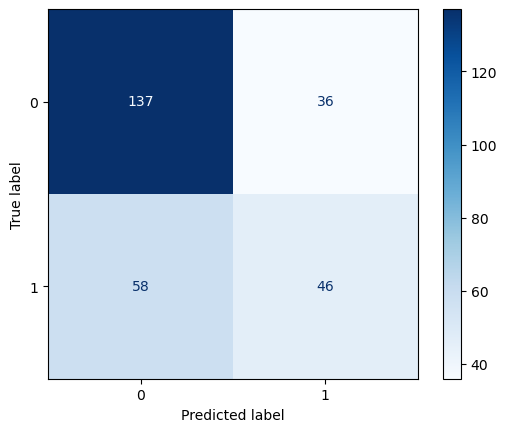

Precision: 0.6494045240369093
Recall: 0.6606498194945848
F1 Score: 0.650724342324005


(0.6494045240369093, 0.6606498194945848, 0.650724342324005)

In [49]:
# Hyperparameters
nn = 6
# Modeling
model = neighbors.KNeighborsClassifier(n_neighbors=nn)
model.fit(X_train, Y_train)
# Evaluation
Y_pred = model.predict(X_test)
# Convert Y_pred to float
Y_pred_float = Y_pred.astype(float)
evaluate.evaluate(Y_test, Y_pred_float, nn, 1)

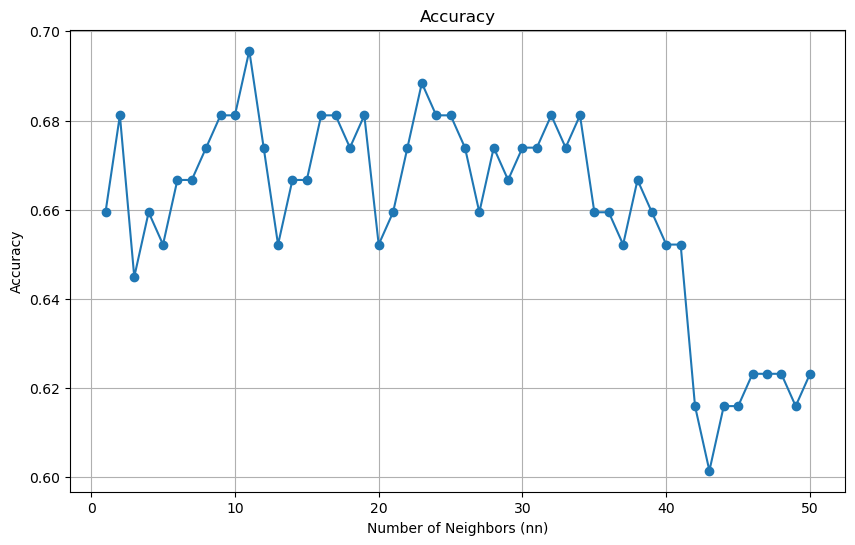

Number of neighbors: 11


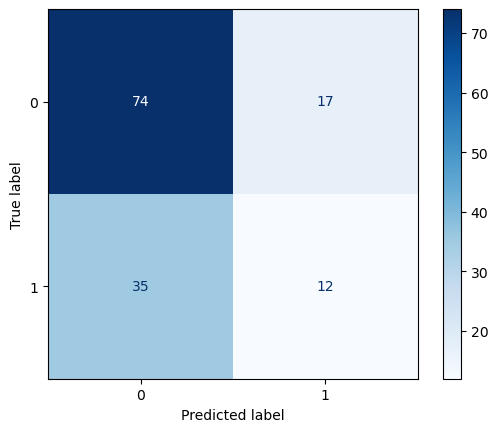

Precision: 0.5886093650422496
Recall: 0.6231884057971014
F1 Score: 0.5955225019069411


In [68]:
# Tuning to find best nn and metric
# l1, l2, haversine, cosine
acc = []
max_nn = 0
max_acc = -1e9
for i in range(1, 51):
    model = neighbors.KNeighborsClassifier(n_neighbors=i, metric='l2')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_validation)
    Y_pred_float = Y_pred.astype(float)
    acc.append(accuracy_score(Y_validation, Y_pred_float))
    if(max_acc < acc[-1]):
        max_acc = acc[-1]
        max_nn = i

# Plotting accuracy against number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), acc, marker='o')
plt.title('Accuracy')
plt.xlabel('Number of Neighbors (nn)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

evaluate.evaluate(Y_validation, Y_pred_float, max_nn, 1)

### KNN - Scratch

In [ ]:
from statistics import mode

class KNN_Model():
    def __init__(self, X, Y, d='minkowski'):
        self.X = X
        self.Y = Y
        self.car, self.dim = X.shape
        self.dist = DistanceMetric.get_metric(d)
    
    def most_frequent(self, lst):
        return mode(lst)

    def predict(self, X_test, nn=3):
        label = []
        for i in range(X_test.shape[0]):
            dis = []
            for j in range(self.car):
                dd = self.dist.pairwise([X_test[i]], [self.X[j]])[0][0]
                dis.append((dd, self.Y[j]))
            
            # Sort distances and get the nearest nn
            dis.sort(key=lambda x: x[0])
            nearest_neighbors = [float(y) for _, y in dis[:nn]]  # List of labels
            
            # Get the most frequent label among the nearest neighbors
            label.append(self.most_frequent(nearest_neighbors))
        
        return np.array(label)

Number of neighbors: 3


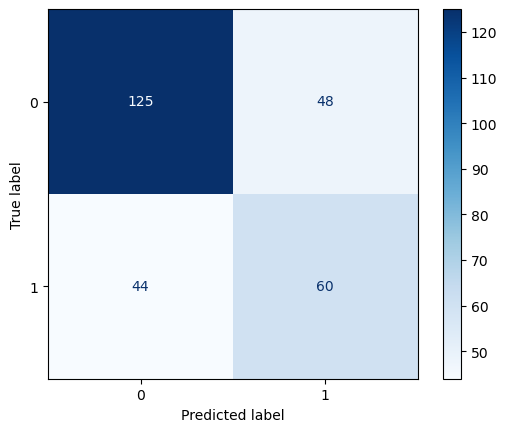

Precision: 0.6705283670015689
Recall: 0.6678700361010831
F1 Score: 0.6690610571566623
Accuracy: 0.6678700361010831


In [97]:
model = KNN_Model(X=X_train, Y=Y_train)
Y_pred = model.predict(X_test, 5)
evaluate.evaluate(Y_test, Y_pred, 3, 1)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")